In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
df = pd.read_csv('/content/Sales Data.csv')

# **Data Cleaning**

In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace=True)
print(df.head())

   Order ID               Product  Quantity Ordered  Price Each  \
0    295665    Macbook Pro Laptop                 1     1700.00   
1    295666    LG Washing Machine                 1      600.00   
2    295667  USB-C Charging Cable                 1       11.95   
3    295668      27in FHD Monitor                 1      149.99   
4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New York City     7  
2    11.95   New York City    18  
3   149.99   San F

In [ ]:
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0
Hour,0


In [ ]:
df.drop_duplicates() # 5 Duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [ ]:
print(df.dtypes)

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# **Feature Engineering**






In [ ]:
# Year
df['Year'] = df['Order Date'].dt.year
print(df['Year'].unique())
df.head()

[2019 2020]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019


In [ ]:
# Year And Month
df["YearMonth"] = df['Order Date'].dt.to_period('M')
df["YearMonth"] = df['YearMonth'].dt.to_timestamp()
df.dtypes

,0
Order ID,int64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object
Month,int64
Sales,float64
City,object
Hour,int64


In [ ]:
# Time SLot
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Time Slot'] = pd.cut(df['Hour'],bins=bins, labels=labels)
df.isnull().sum()
df.fillna('Night',inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year,YearMonth,Time Slot
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,2019-12-01,Night
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,2019-12-01,Morning
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,2019-12-01,Afternoon
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,2019-12-01,Afternoon
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,2019-12-01,Morning


In [ ]:
# Day Type Weekend or Weekday
df['Day Name'] = df['Order Date'].dt.day_name()
df['DayType'] = df['Day Name'].map(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year,YearMonth,Time Slot,Day Name,DayType
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,2019-12-01,Night,Monday,Weekday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,2019-12-01,Morning,Sunday,Weekend
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,2019-12-01,Afternoon,Thursday,Weekday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,2019-12-01,Afternoon,Sunday,Weekend
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,2019-12-01,Morning,Wednesday,Weekday


In [ ]:
# Single Vs Multiple Orders
df['Quantity Ordered'].nunique()
bins = [0,1,10]
labels = ['Single','Multiple']
df['Order Type'] = pd.cut(df['Quantity Ordered'],bins=bins, labels=labels)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year,YearMonth,Time Slot,Day Name,DayType,Order Type
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,2019-12-01,Night,Monday,Weekday,Single
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,2019-12-01,Morning,Sunday,Weekend,Single
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,2019-12-01,Afternoon,Thursday,Weekday,Single
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,2019-12-01,Afternoon,Sunday,Weekend,Single
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,2019-12-01,Morning,Wednesday,Weekday,Single


# **Exploratory Data Analysis (EDA)**

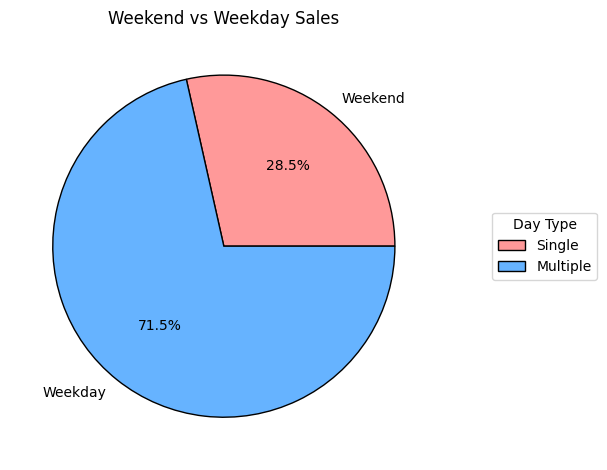

In [ ]:
# Weekend vs Weekday Sales
DayType_Sales = df.groupby('DayType')['Sales'].sum()
weekend_sales = DayType_Sales['Weekend']
weekday_sales = DayType_Sales['Weekday']
colors = ['#ff9999', '#66b3ff']
plt.pie([weekend_sales, weekday_sales], labels=['Weekend', 'Weekday'], autopct='%1.1f%%',colors=colors,wedgeprops={'edgecolor': 'black'})
plt.legend(labels, title="Day Type",loc = 'center', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Weekend vs Weekday Sales')
plt.tight_layout()
plt.show()

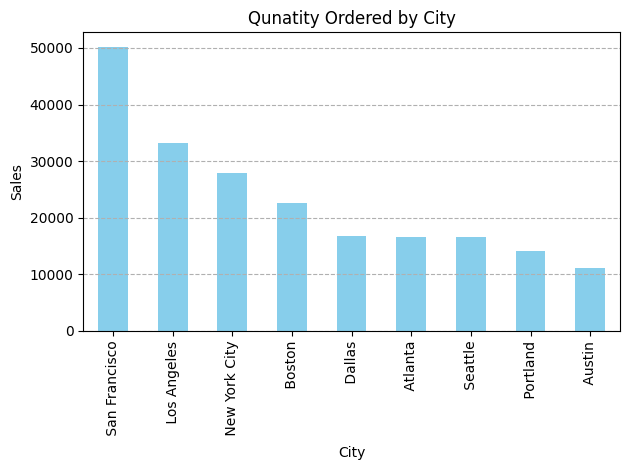

In [ ]:
# Quantity Ordered VS City
city_sales = df.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar',color = 'skyblue')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Qunatity Ordered by City')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


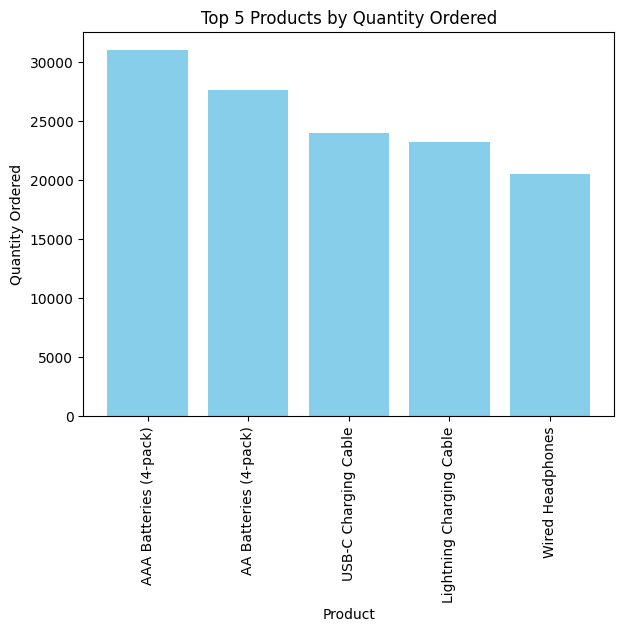

In [ ]:
# Top 5 Products by Quantity Ordered
product_orders = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
top5 = product_orders.head(5)
plt.bar(top5.index, top5.values,color = 'skyblue')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Top 5 Products by Quantity Ordered')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

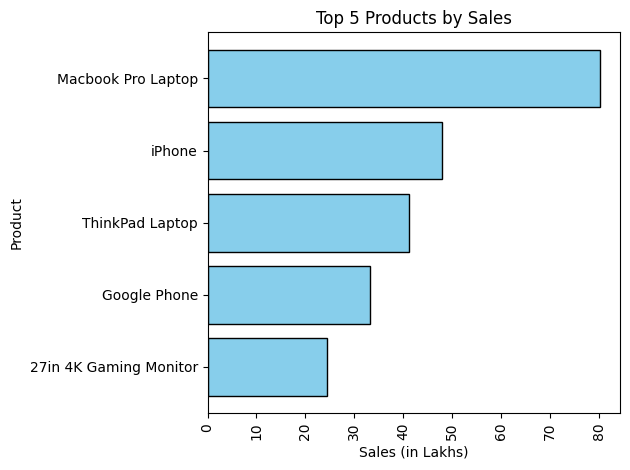

In [ ]:
# Top 5 Products by Sales
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
product_sales_lakhs = product_sales/1e5
top5 = product_sales_lakhs.head(5)
plt.barh(top5.index, top5.values, color='skyblue', edgecolor='black')
plt.xlabel('Sales (in Lakhs)')
plt.ylabel('Product')
plt.title('Top 5 Products by Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


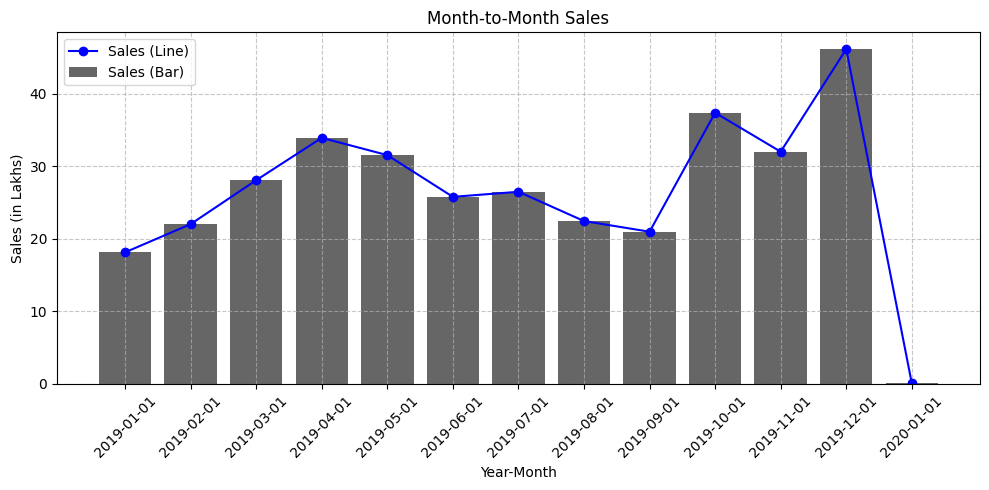

In [ ]:
# Monthly Trend Using Matplotlib
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
monthly_sales = monthly_sales / 1e5

fig, ax = plt.subplots(figsize=(10,5))
x = monthly_sales.index.astype(str)

ax.bar(x, monthly_sales.values, color='black', alpha=0.6, label='Sales (Bar)')
ax.plot(x, monthly_sales.values, marker='o', linestyle='-', color='blue', label='Sales (Line)')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Sales (in Lakhs)')
ax.set_title('Month-to-Month Sales')
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
ax.legend()
plt.show()


In [ ]:
# Single Vs Multiple Orders
df['Product'].unique()
matrix = df.groupby(['Product', 'Order Type']).size().unstack()
print(matrix)

Order Type                  Single  Multiple
Product                                     
20in Monitor                  4073        28
27in 4K Gaming Monitor        6216        14
27in FHD Monitor              7464        43
34in Ultrawide Monitor        6163        18
AA Batteries (4-pack)        15333      5244
AAA Batteries (4-pack)       13726      6915
Apple Airpods Headphones     15438       111
Bose SoundSport Headphones   13195       130
Flatscreen TV                 4781        19
Google Phone                  5518         7
LG Dryer                       646         0
LG Washing Machine             666         0
Lightning Charging Cable     20210      1448
Macbook Pro Laptop            4720         4
ThinkPad Laptop               4126         2
USB-C Charging Cable         20019      1884
Vareebadd Phone               2062         3
Wired Headphones             17361      1521
iPhone                        6835         7


<ipython-input-84-1f49bf7ab24a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matrix = df.groupby(['Product', 'Order Type']).size().unstack()


# **Moving Average**

In [ ]:
Q1 = monthly_sales.quantile(0.25)
Q3 = monthly_sales.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
monthly_sales = monthly_sales[(monthly_sales >= lower_bound) & (monthly_sales <= upper_bound)]

In [ ]:
# 3 Day SMA
SMA_3DAY = monthly_sales.rolling(3).mean()
print(SMA_3DAY)

YearMonth
2019-01-01          NaN
2019-02-01          NaN
2019-03-01    22.742364
2019-04-01    27.999310
2019-05-01    31.167925
2019-06-01    30.403598
2019-07-01    27.927283
2019-08-01    24.900153
2019-09-01    23.299346
2019-10-01    26.929183
2019-11-01    30.112967
2019-12-01    38.499245
Name: Sales, dtype: float64


In [ ]:
# 7 Days Simple Moving Average
simple_moving_average = monthly_sales.rolling(7).mean()
print(simple_moving_average)

YearMonth
2019-01-01          NaN
2019-02-01          NaN
2019-03-01          NaN
2019-04-01          NaN
2019-05-01          NaN
2019-06-01          NaN
2019-07-01    26.559378
2019-08-01    27.174922
2019-09-01    27.025691
2019-10-01    28.353728
2019-11-01    28.080776
2019-12-01    30.167685
Name: Sales, dtype: float64


In [ ]:
# Cummalative Moving Average
cumma_moving_average = monthly_sales.expanding().mean()
print(cumma_moving_average)

YearMonth
2019-01-01    18.135864
2019-02-01    20.078044
2019-03-01    22.742364
2019-04-01    25.533449
2019-05-01    26.731972
2019-06-01    26.572981
2019-07-01    26.559378
2019-08-01    26.045040
2019-09-01    25.481769
2019-10-01    26.670319
2019-11-01    27.154475
2019-12-01    28.736138
Name: Sales, dtype: float64


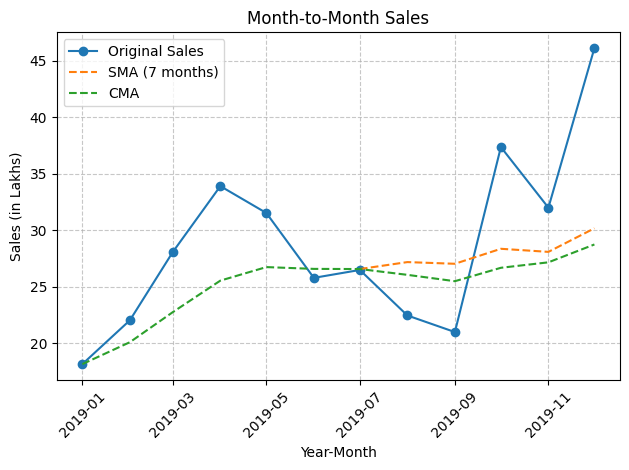

In [ ]:
plt.plot(monthly_sales, marker='o', label='Original Sales')
plt.plot(simple_moving_average.index, simple_moving_average.values, label='SMA (7 months)', linestyle='--')
plt.plot(cumma_moving_average.index, cumma_moving_average.values, label='CMA', linestyle='--')

plt.xlabel('Year-Month')
plt.ylabel('Sales (in Lakhs)')
plt.title('Month-to-Month Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# **Machine Learning Models**

In [ ]:
df_features = pd.DataFrame({'Sales': monthly_sales.values,'SMA': simple_moving_average.values,'CMA': cumma_moving_average.values}, index=monthly_sales.index)
df_features['Year'] = df_features.index.year
df_features['Month'] = df_features.index.month
df_features['Lag_1'] = df_features['Sales'].shift(1)
df_features.dropna(inplace=True)


X = df_features.drop('Sales', axis=1)
y = df_features['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: ", rmse)
print(f"Linear Regression R2 Score: ", r2)



Linear Regression RMSE:  9.913630510597883
Linear Regression R2 Score:  -0.9666398413979869


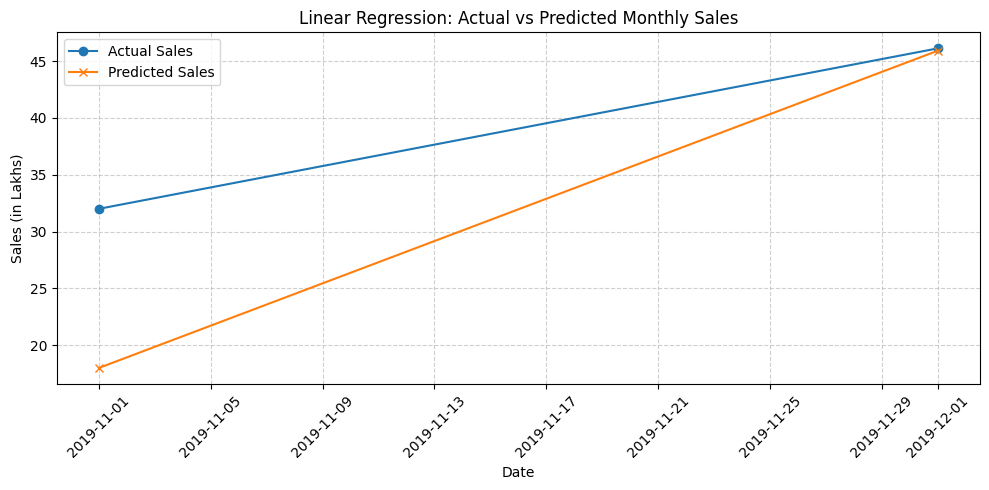

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual Sales', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Sales', marker='x')
plt.title('Linear Regression: Actual vs Predicted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales (in Lakhs)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# XGBOOST REGRESSOR
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: ",rmse)
print(f"XGBoost R2 Score: ",r2)

XGBoost RMSE:  9.193344757967884
XGBoost R2 Score:  -0.691244783512672


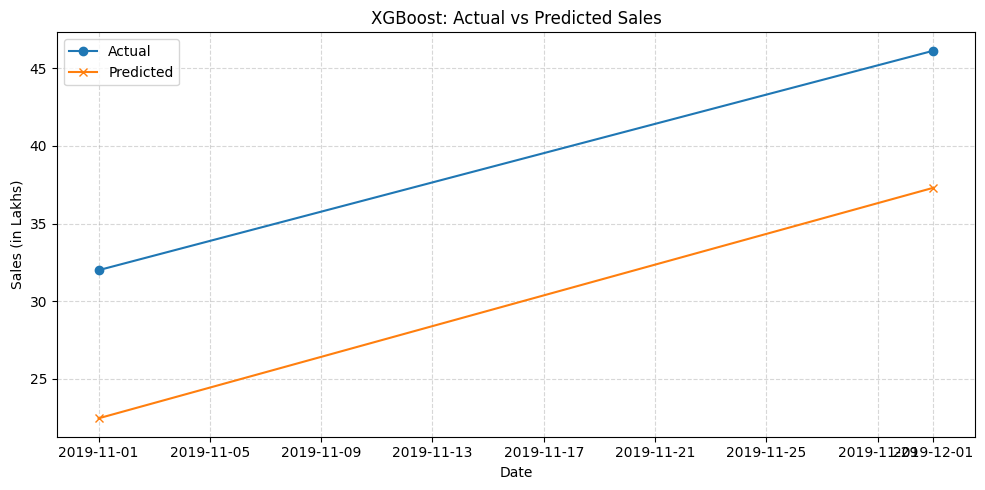

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.title('XGBoost: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales (in Lakhs)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **Time Series Model (ARIMA)**

In [114]:
from statsmodels.tsa.arima.model import ARIMA

monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['YearMonth', 'Sales']
monthly_sales_df['YearMonth'] = pd.to_datetime(monthly_sales_df['YearMonth'])
monthly_sales_df.set_index('YearMonth', inplace=True)

In [115]:
model = ARIMA(monthly_sales_df['Sales'], order=(1,1,1))
model_fit = model.fit()

forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)

march_2020_forecast = forecast.loc['2020-03-01']
april_2020_forecast = forecast.loc['2020-04-01']

future_dates = pd.date_range(start=monthly_sales_df.index[-1], periods=forecast_steps+1, freq='MS')[1:]
forecast_df = pd.DataFrame({'Sales': forecast.values}, index=future_dates)

combined = pd.concat([monthly_sales_df['Sales'], forecast_df['Sales']])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


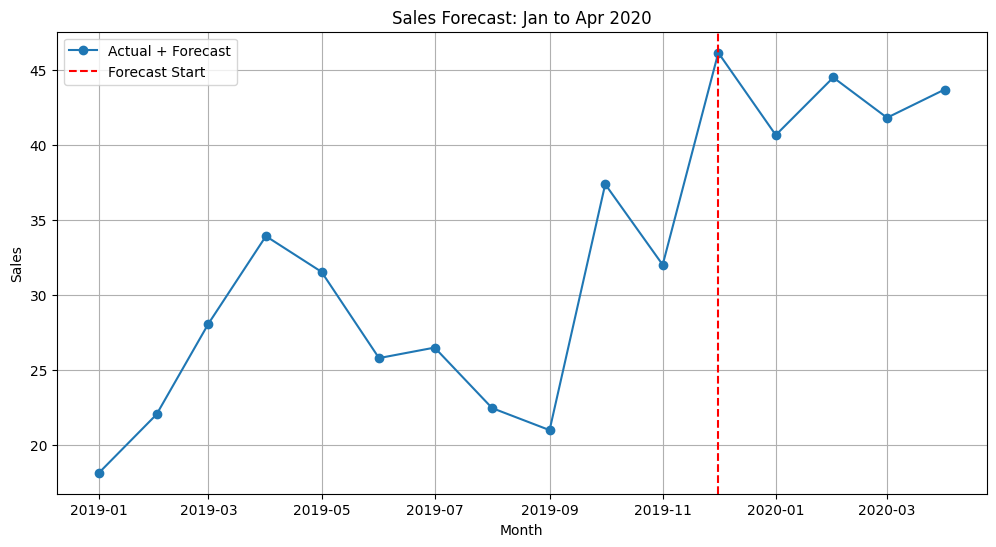

In [116]:
plt.figure(figsize=(12,6))
plt.plot(combined, marker='o', label='Actual + Forecast')
plt.axvline(x=monthly_sales_df.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Sales Forecast: Jan to Apr 2020')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()